In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use(['ggplot', 'seaborn-talk'])

## Generating DataSet

the dataset we are generating is just a simulation where we suppose to analyze the employees, we could assume that the level of education, the time spent in the current position and the age are mutually independent and consider them as inputs. Salary and promotion possibilities could be the outputs that depend on the inputs.

just for the sake of practice in this notebook we're going to create  a simple model with one feature as an example in which we estimate the salary as a function of ages

In [3]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

In [4]:
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=33)

y_scaler = MinMaxScaler(feature_range=(20, 110))
x_scaler = MinMaxScaler(feature_range=(18,65))

y = y_scaler.fit_transform(y.reshape(-1,1))
x = x_scaler.fit_transform(x.reshape(-1,1))

## Linear Regression
Supervised machine learning algorithms analyze a number of observations and try to mathematically express the dependence between the inputs and outputs. These mathematical representations of dependencies are the models.

In [5]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x,y)
y_pred = linreg.predict(x)

Text(0, 0.5, 'Income in thousands')

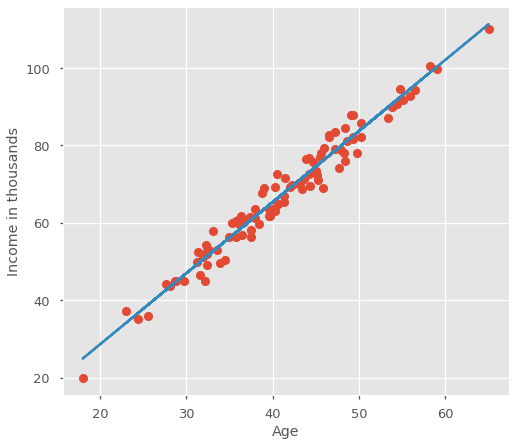

In [6]:
fig, ax1 = plt.subplots()
fig.set_figwidth(8,4)
ax1.plot(x,y, 'o')
ax1.plot(x, y_pred)
ax1.set_xlabel('Age')
ax1.set_ylabel('Income in thousands')

## Classification
Classification is a very important area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features.. A large number of important machine learning problems fall within this area. There are many classification methods, and logistic regression is one of them.

<p>The features or variables can take one of two forms:<p/>
<p>1-Independent variables, also called inputs or predictors, don’t depend on other features of interest (or at least you assume so for the purpose of the analysis).<p/>
<p>2-Dependent variables, also called outputs or responses, depend on the independent variables.<p/>

### Create a binary version of Y

In [7]:
y_copy = y.copy()

y_binary = (y_copy > 70).astype(int)

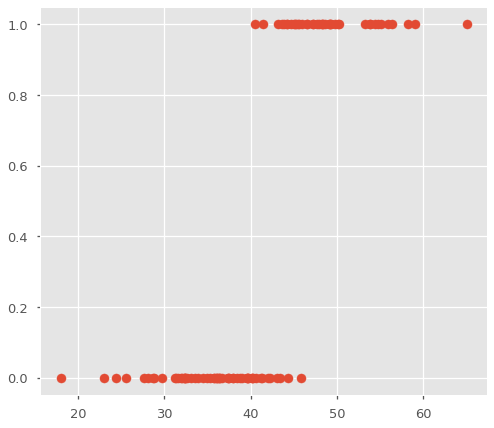

In [8]:
fig, ax1 = plt.subplots()
fig.set_figwidth(8,3)
ax1.scatter(x, y_binary)

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [11]:
logreg = LogisticRegression(solver='liblinear')

logreg.fit(x, y_binary.ravel())

LogisticRegression(solver='liblinear')

The above statement creates an instance of LogisticRegression and binds its references to the variable model. LogisticRegression has several optional parameters that define the behavior of the model and approach:

<p>in our example we're going to use the parameter "solver"<p/>SOLVER : is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

In [12]:
logreg.classes_

array([0, 1])

We can quickly get the attributes of your model. For example, the attribute .classes_ represents the array of distinct values that y takes:

###  Evaluate the Model

In [183]:
logreg_pred = logreg.predict_proba(x)

In [184]:
x_predicted[:5]

array([1, 0, 0, 0, 0])

In [185]:
logreg_pred[:5]

array([[0.45641669, 0.54358331],
       [0.66928316, 0.33071684],
       [0.60849917, 0.39150083],
       [0.73943801, 0.26056199],
       [0.53977583, 0.46022417]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

In [163]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [216]:
x_values = np.arange(x.min(), x.max(), 0.1)
logreg_predicted = logreg.predict_proba(x_values.reshape(-1,1))

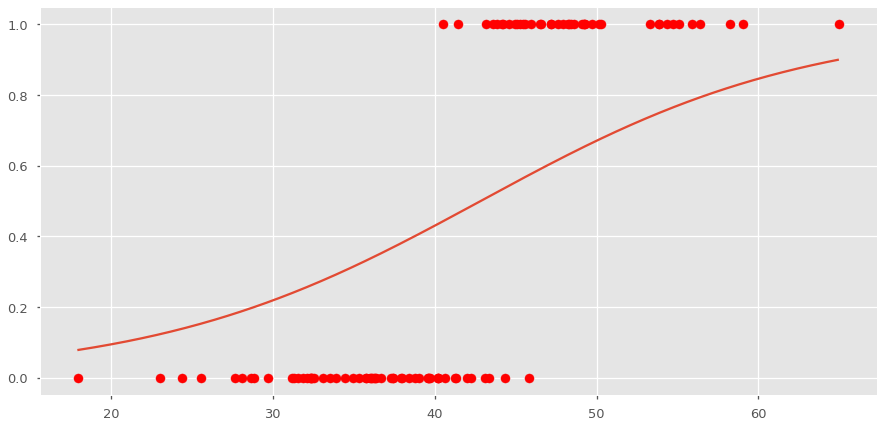

In [219]:
fig, ax1 = plt.subplots()
fig.set_figwidth(15,5)

ax1.scatter(x=x, y=y_binary, color='red')
ax1.plot(x_values, logreg_predicted[:,1])

## Evaluating Model Performance

Confusion Matrix

In [220]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [222]:
y_predicted = logreg.predict(x)

In [224]:
conf_mx = confusion_matrix(y_binary, y_predicted)
conf_mx

array([[54,  4],
       [ 2, 40]])

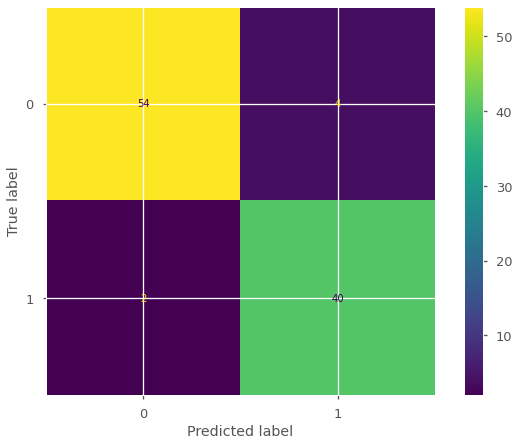

In [230]:
plot_confusion_matrix(logreg, x, y_binary)